In [33]:
import importlib
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import numpy as np
from math import nan

from CASutils import mapplot_utils as maps
from CASutils import colorbar_utils as cbars
from CASutils import plotposition_utils as pos
from cartopy.util import add_cyclic_point
importlib.reload(maps)
importlib.reload(pos)

<module 'CASutils.plotposition_utils' from '/home/islas/python/CASanalysis/CASutils/plotposition_utils.py'>

In [2]:
plotpath="/project/cas/islas/python_plots/snowpaper/FIGURES/"

In [3]:
landfrac = xr.open_dataset("/project/cas/islas/cesmle/fx/landfraclens.nc")
landfrac = landfrac.LANDFRAC
landfrac = np.array(landfrac[0,:,:])

In [4]:
filepath="/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/"

In [5]:
both_1 = xr.open_mfdataset(filepath+"TVAR_Isla_CAM6_CLM5.nc")
both_2 = xr.open_mfdataset(filepath+"TVAR_Isla_CAM6_CLM5_002.nc")
both_3 = xr.open_mfdataset(filepath+"TVAR_Cecile_CAM6_CLM5.nc")
cam6_clm5 = (both_1 + both_2 + both_3)/3.

In [6]:
goga1path="/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/TVAR_GOGA1.nc"
goga1 = xr.open_dataset(goga1path)
goga1varm = goga1.goga1var_djf.mean('Member')

In [7]:
goga2path="/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/TVAR_GOGA2.nc"
goga2 = xr.open_dataset(goga2path)
goga2varm = goga2.goga2var_djf.mean('Member')

In [8]:
cam6_clm4 = xr.open_mfdataset(filepath+"TVAR_Cecile_CAM6_CLM4.nc")
cam5_clm5 = xr.open_mfdataset(filepath+"TVAR_Cecile_CAM5_CLM5.nc")
cam5_clm4 = xr.open_mfdataset(filepath+"TVAR_Cecile_CAM5_CLM4.nc")

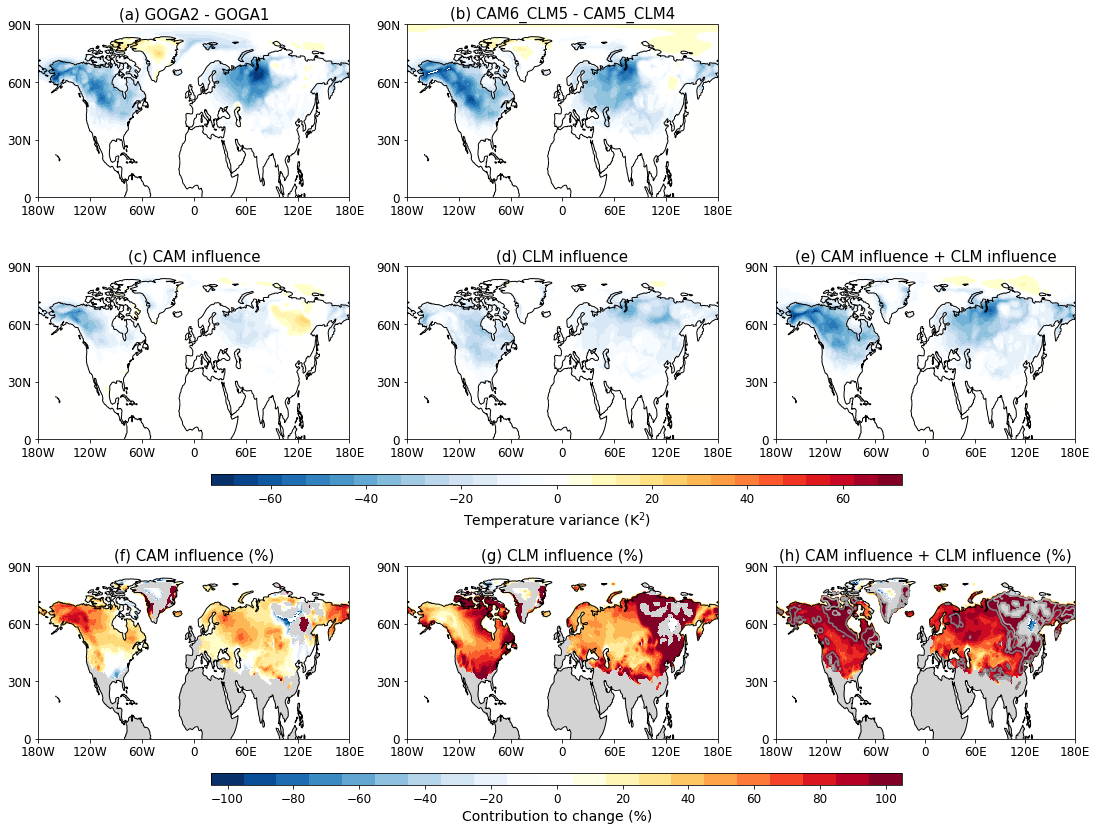

In [36]:
fig = plt.figure(figsize=(16,16))

ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(goga2varm) - np.array(goga1varm), np.array(goga1varm.lon), np.array(goga1varm.lat),
                                                5,-70,70,'(a) GOGA2 - GOGA1',0.05,0.32,0.8,0.95, fontsize=15)

ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(cam6_clm5.djfvar) - np.array(cam5_clm4.djfvar), np.array(cam6_clm5.lon), np.array(cam6_clm5.lat),
                                               5,-70,70,'(b) CAM6_CLM5 - CAM5_CLM4',0.37,0.64,0.8,0.95, fontsize=15)

ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(cam6_clm5.djfvar) - np.array(cam5_clm5.djfvar), np.array(cam6_clm5.lon), np.array(cam6_clm5.lat),
                                               5,-70,70,'(c) CAM influence',0.05,0.32,0.59,0.74, fontsize=15)

ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(cam6_clm5.djfvar) - np.array(cam6_clm4.djfvar), np.array(cam6_clm5.lon), np.array(cam6_clm5.lat),
                                               5,-70,70,'(d) CLM influence',0.37,0.64,0.59,0.74, fontsize=15)

sumparts = (np.array(cam6_clm5.djfvar) - np.array(cam5_clm5.djfvar)) + (np.array(cam6_clm5.djfvar) - np.array(cam6_clm4.djfvar))

ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, sumparts, np.array(cam6_clm5.lon), np.array(cam6_clm5.lat),5,-70,70,'(e) CAM influence + CLM influence',
                                               0.69,0.95,0.59,0.74, fontsize=15)

totaldif = np.array(cam6_clm5.djfvar) - np.array(cam5_clm4.djfvar)
camper = ((np.array(cam6_clm5.djfvar) - np.array(cam5_clm5.djfvar))/totaldif)*100.
clmper = ((np.array(cam6_clm5.djfvar) - np.array(cam6_clm4.djfvar))/totaldif)*100.

camper[np.where(np.absolute(totaldif) < 5)] = 0
clmper[np.where(np.absolute(totaldif) < 5)] = 0

mask = np.zeros([cam6_clm5.lat.size, cam6_clm5.lon.size])*nan
mask = np.where( (np.absolute(totaldif) < 5) & (landfrac > 0.5), 1, 0)

ax = cbars.plotcolorbar(fig, 5, -70, 70, 'Temperature variance (K$^{2}$)', 0.2,0.8,0.55,0.56,ticks=([-60,-40,-20,0,20,40,60]), fsize=12)

ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, camper*landfrac, np.array(cam6_clm5.lon), np.array(cam6_clm5.lat),
                                              10,-100,100,'(f) CAM influence (%)',0.05,0.32,0.33,0.48, fontsize=15)
dat, lon = add_cyclic_point(mask, coord = cam6_clm5.lon)
ax.contourf(lon, np.array(cam6_clm5.lat), dat, levels=[0.99,1.01], colors=['lightgray','lightgray'])

ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, clmper*landfrac, np.array(cam6_clm5.lon), np.array(cam6_clm5.lat),
                                               10,-100,100,'(g) CLM influence (%)',0.37,0.64,0.33,0.48, fontsize=15)
dat, lon = add_cyclic_point(mask, coord = cam6_clm5.lon)
ax.contourf(lon, np.array(cam6_clm5.lat), dat, levels=[0.99,1.01], colors=['lightgray','lightgray'])


ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, (camper+clmper)*landfrac, np.array(cam6_clm5.lon), np.array(cam6_clm5.lat),
                                                10,-100,100,'(h) CAM influence + CLM influence (%)',0.69,0.95,0.33,0.48, fontsize=15)
dat, lon = add_cyclic_point(mask, coord = cam6_clm5.lon)
ax.contourf(lon, np.array(cam6_clm5.lat), dat, levels=[0.99,1.01], colors=['lightgray','lightgray'])

ax.contour(np.array(cam6_clm5.lon), np.array(cam6_clm5.lat), (camper+clmper)*landfrac, levels=[100], colors='gray')
ax.contour(np.array(cam6_clm5.lon), np.array(cam6_clm5.lat), (camper+clmper)*landfrac, levels=[130], colors='darkgray')

ax = cbars.plotcolorbar(fig, 10,-100,100,'Contribution to change (%)',0.2,0.8,0.29,0.3,ticks=([-100,-80,-60,-40,-20,0,20,40,60,80,100]), fsize=12)



fig.savefig(plotpath+"fig3.pdf", facecolor='white', bbox_inches='tight')